Q2. **Train a Neural Network**
Let us design a neural network to classify flowers from Iris dataset.
1. **Implement a single hidden layer MLP**. Final output layer will have **3** neurons, one for each result. **Arch: [Input, hidden, output]**
2. **Now use an NN with two hidden layers**. The **first hidden layer** has **9** neurons. The **second hidden layer** has **3** neurons. Arch: [Input,hidden1,hidden2,output]

(i) **Use keras to design the NN model and train on the iris data**.

(ii) Draw the **schematic diagram** of the **NN 2** along with all the weights and **specify suitable activation function**.
 **How many trainable parameters are there**?
[ 2 (NN1) + 3 (NN2) + 2(diagram)= 7 Marks]

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.models import Sequential
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (12, 8)

In [3]:
import numpy as np
import pandas as pd

In [4]:
headers = ["sepal length in cm", "sepal width in cm", "petal length in cm", "petal width in cm", "class"]

In [5]:
data = pd.read_csv('/content/sample_data/iris.data', header=None, names=headers)
data.head()

sepal length in cm  sepal width in cm  ...  petal width in cm        class
0                 5.1                3.5  ...                0.2  Iris-setosa
1                 4.9                3.0  ...                0.2  Iris-setosa
2                 4.7                3.2  ...                0.2  Iris-setosa
3                 4.6                3.1  ...                0.2  Iris-setosa
4                 5.0                3.6  ...                0.2  Iris-setosa

[5 rows x 5 columns]

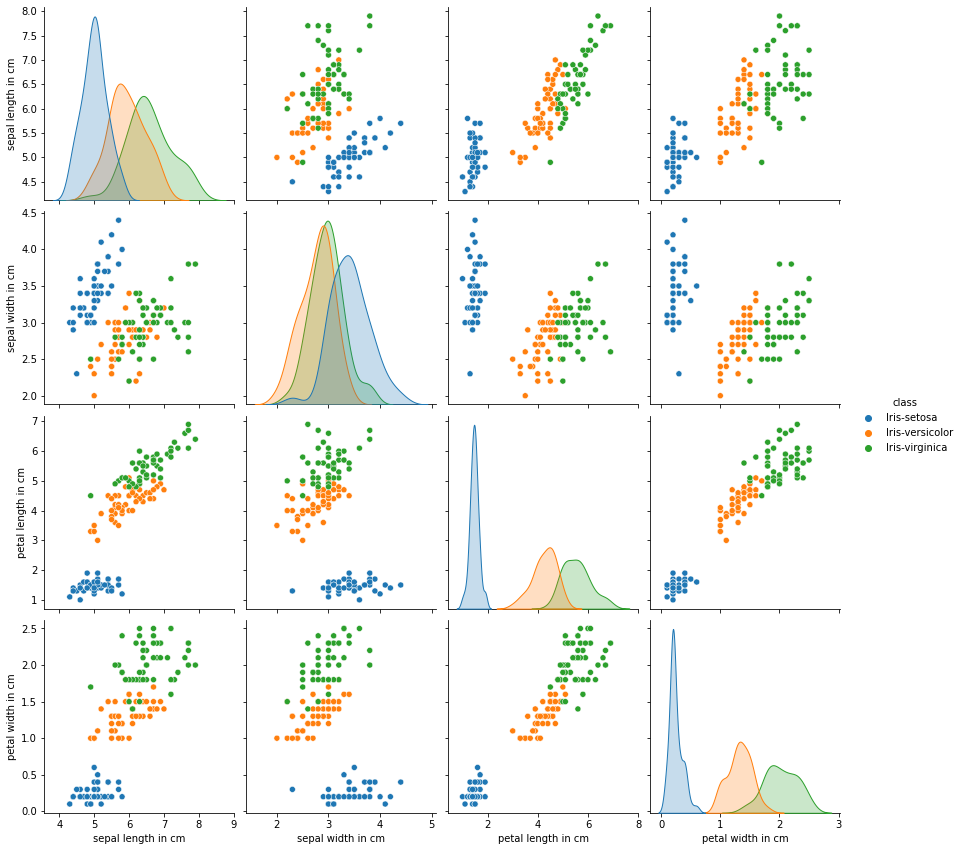

In [6]:
sns.pairplot(data, hue="class", size=3, diag_kind="kde")

In [7]:
dataset = data.values
X = dataset[::, 0:4].astype(np.float)
Y = dataset[::, 4:]
X = normalize(X, axis=0, norm='max')
X[0:6]

array([[0.64556962, 0.79545455, 0.20289855, 0.08      ],
       [0.62025316, 0.68181818, 0.20289855, 0.08      ],
       [0.59493671, 0.72727273, 0.1884058 , 0.08      ],
       [0.58227848, 0.70454545, 0.2173913 , 0.08      ],
       [0.63291139, 0.81818182, 0.20289855, 0.08      ],
       [0.6835443 , 0.88636364, 0.24637681, 0.16      ]])

In [8]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

In [9]:
def single_hidden_layer_model():
  # Create Model
  model = Sequential()
  model.add(Dense(9, input_dim=4, activation='relu'))
  # model.add(Dense(9, activation='relu'))
  model.add(Dense(3, activation='softmax'))
  # Compile Model
  model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [10]:
estimator1 = KerasClassifier(build_fn=single_hidden_layer_model, epochs=200, batch_size=5, verbose=0)

In [11]:
kfold = KFold(n_splits=10, shuffle=True)

In [12]:
results1 = cross_val_score(estimator1, X, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results1.mean()*100, results1.std()*100))

Baseline: 96.00% (5.33%)


In [13]:
single_hidden_layer_model().summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 9)                 45        
_________________________________________________________________
dense_21 (Dense)             (None, 3)                 30        
Total params: 75
Trainable params: 75
Non-trainable params: 0
_________________________________________________________________


In [14]:
def double_hidden_layer_model():
  # Create Model
  model = Sequential()
  model.add(Dense(9, input_dim=4, activation='relu'))
  # model.add(Dense(9, activation='relu', name='hidden1'))
  model.add(Dense(3, activation='sigmoid', name='hidden2'))
  model.add(Dense(3, activation='softmax'))
  # Compile Model
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [15]:
estimator2 = KerasClassifier(build_fn=double_hidden_layer_model, epochs=200, batch_size=5, verbose=0)

In [16]:
results2 = cross_val_score(estimator2, X, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results2.mean()*100, results2.std()*100))

Baseline: 97.33% (3.27%)


In [17]:
double_hidden_layer_model().summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 9)                 45        
_________________________________________________________________
hidden2 (Dense)              (None, 3)                 30        
_________________________________________________________________
dense_43 (Dense)             (None, 3)                 12        
Total params: 87
Trainable params: 87
Non-trainable params: 0
_________________________________________________________________


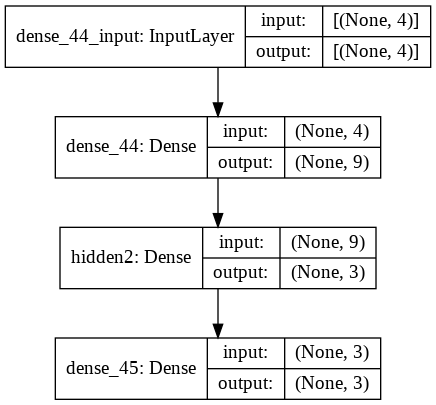

In [18]:
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(double_hidden_layer_model(), to_file=dot_img_file, show_shapes=True)

In [21]:
!pip3 install ann_visualizer

  Created wheel for ann-visualizer: filename=ann_visualizer-2.5-cp36-none-any.whl size=4169 sha256=db948925b5684b4a3bc234e806190b806ea49151e7f015a78847af8d06dcd045
  Stored in directory: /root/.cache/pip/wheels/b6/b4/4e/d92f50c9c4f004cf315a0e0fcd455486bd799c50fe80cf1f5d
Successfully built ann-visualizer


In [22]:
from ann_visualizer.visualize import ann_viz
ann_viz(double_hidden_layer_model(), view=True)

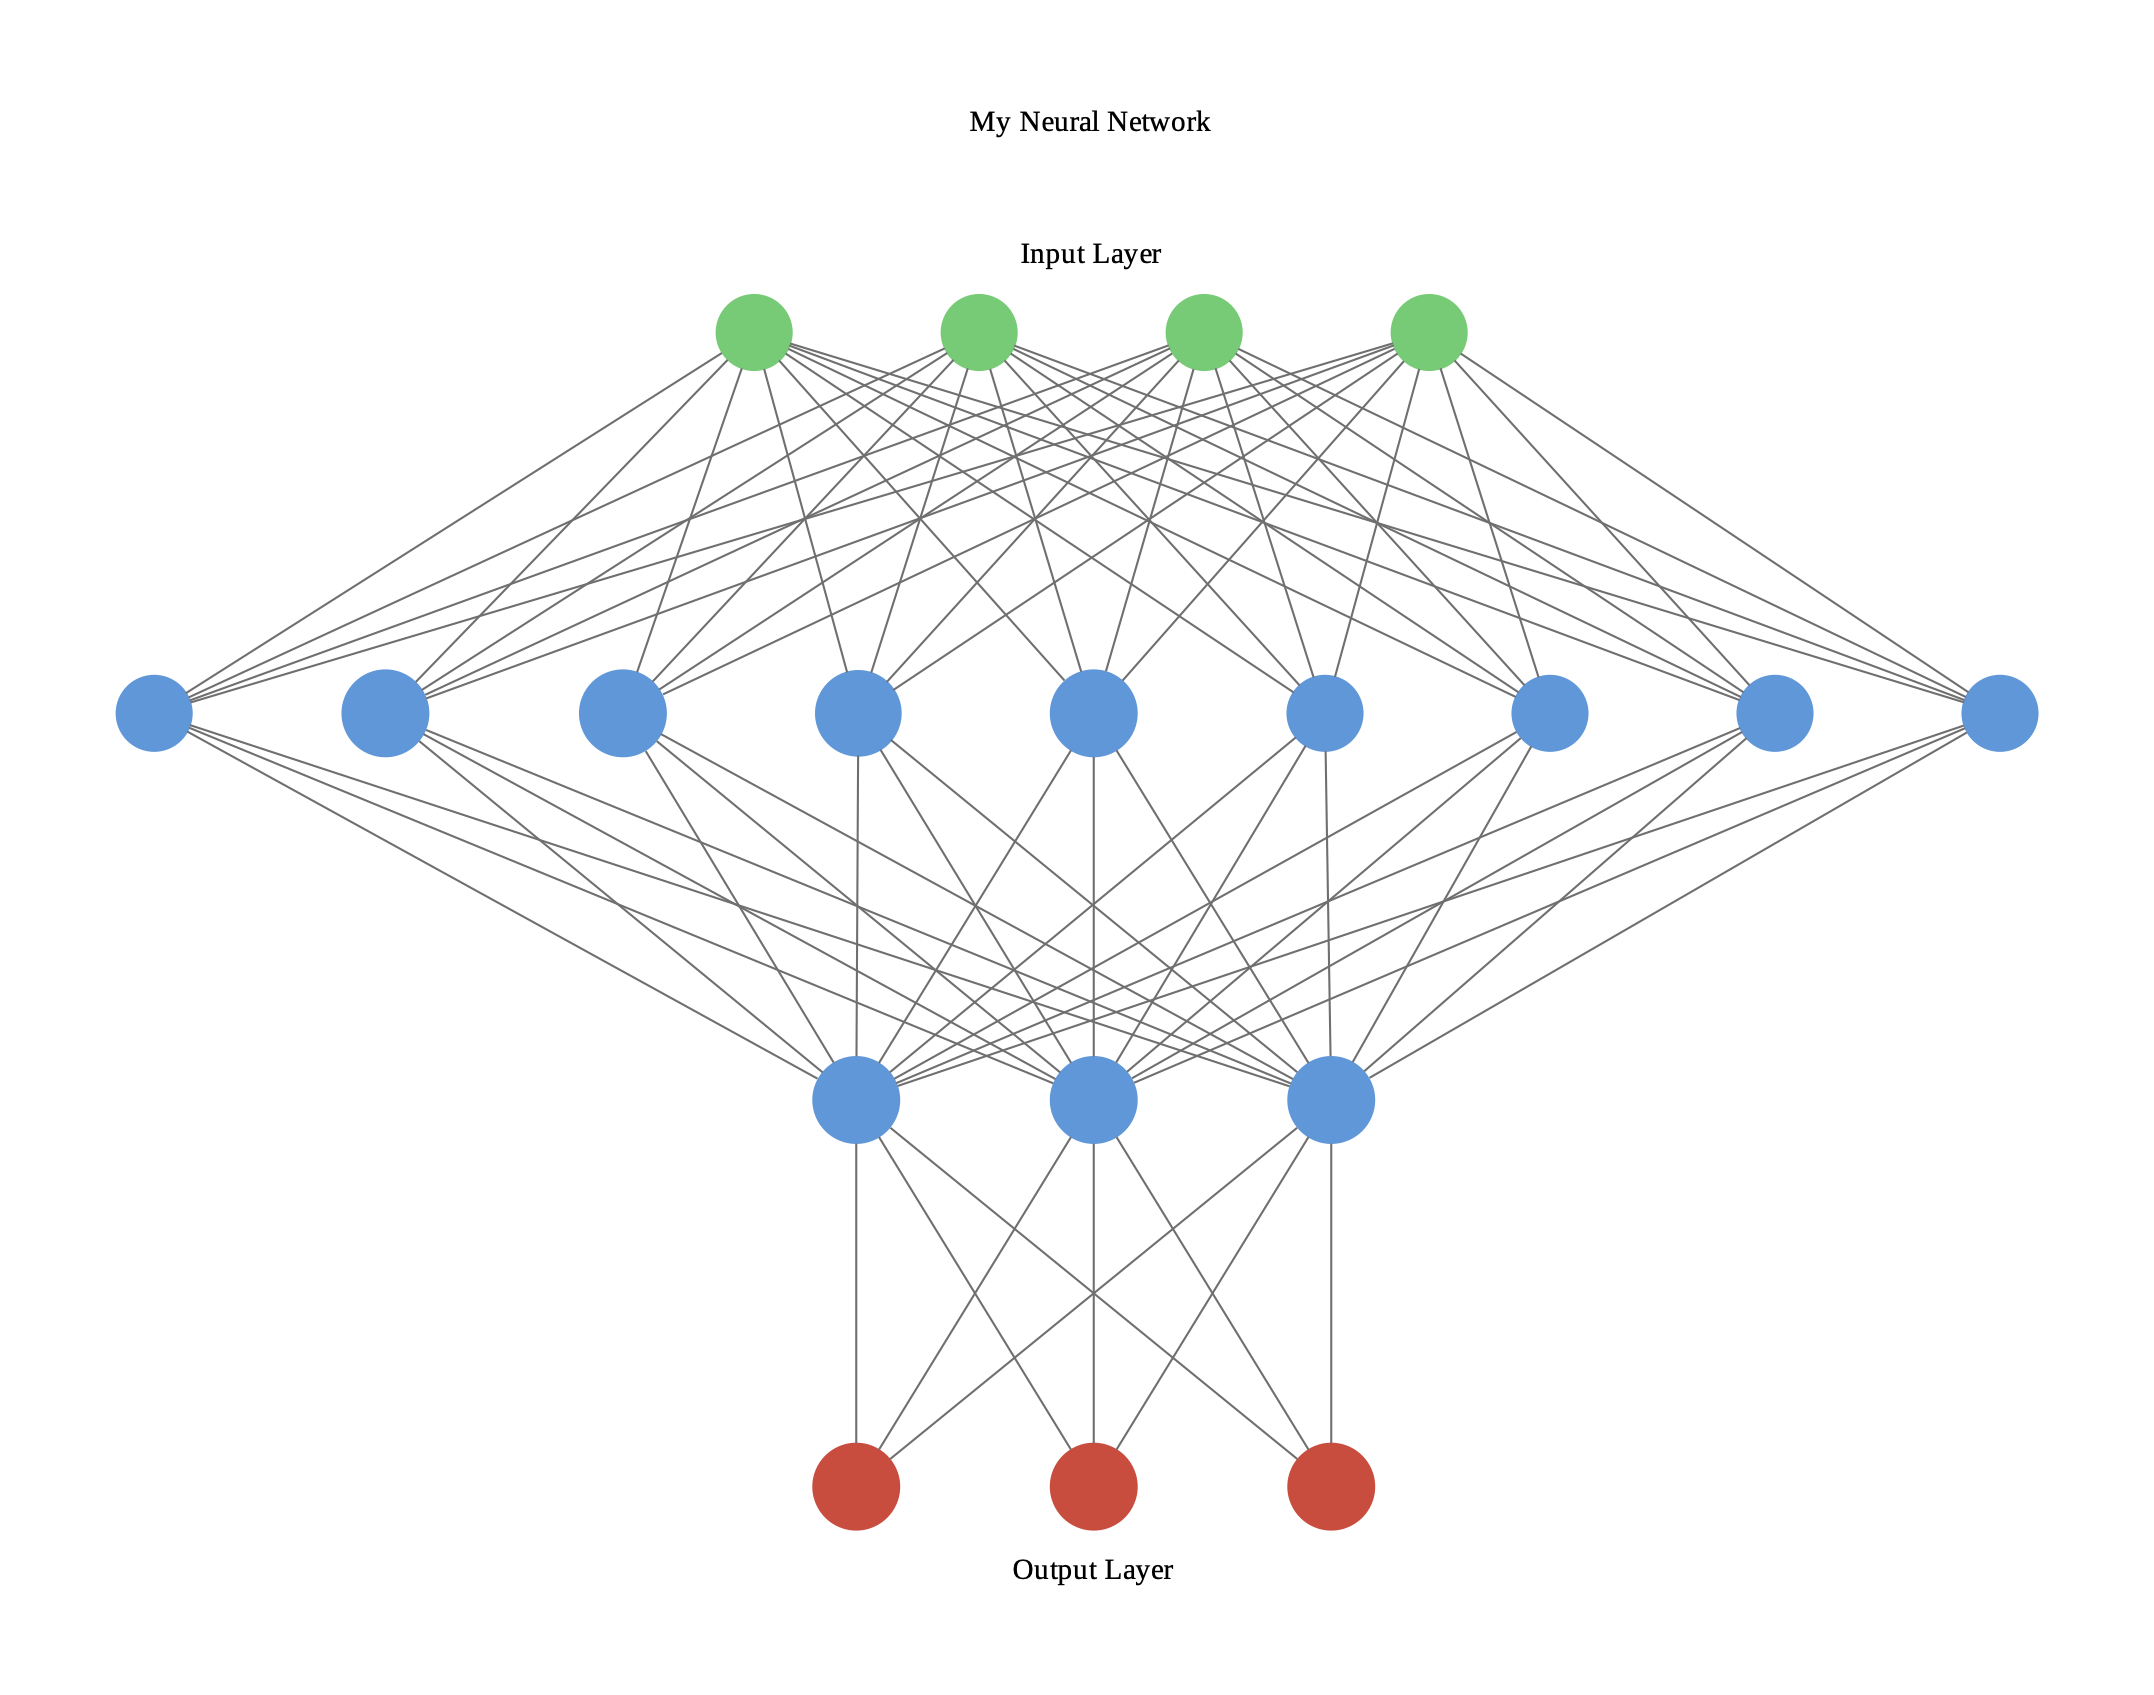
